# CMPS 261 -Machine Learning: Assignment 2

### General Information:
<p>Feel free to add cells if required.<br> Feel free to write your own function block to reduce the redundancy.<br> Answers belong into the corresponding cells (below the question). <br><br> If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.<br><br>When editing an assignment there can be the case that there are variables in the Runtime. To make sure your assignment works, please restart the Runtime and run all cells before submitting (e.g. via <i>Runtime -> Restart & Run All</i>). We don't consider that respective solution if you make this mistake <b>(no excuse)</b>.</p>
    <br><br><b> Give proper comments, follow camel case for the function name, use proper readable variable names to your coding, if you didn't follow the instructions there will be points reduction.</b><br><br><br>

## <b>Whenever you are asked to report results, you are expected to perform 5-fold cross validation</b>
<hr>


### Submission:
<p> Use the following naming format for your IPYNB: <b>Ass#_xyz0000</b>  (where # is the assignment number and xyz0000 is your AUB Net)<br>
<font color=red><b><i>If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.<b><i></font>







In [1]:
'''
Enter your Netid (ie: xyz0000) into the variable user.
Enter your id number into the variable id.
'''
user = 'ojm05'
user_id='202241607'

In [2]:

#Headers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from scipy import optimize

%matplotlib inline

# Part 1 - Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether
a student gets admitted into a university. Suppose that you are the administrator of a
university department and you want to determine each applicant’s chance of admission
based on their results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training example, you
have the applicant’s scores on two exams and the admissions decision. Your task is to
build a classification model that estimates an applicant’s probability of admission based
the scores from those two exams


### Data Preprocessing

Given the file "admission_data1.csv" <br>
a) Start by plotting the data such that the axes are the two exam scores, and the positive and negative examples are shown with
different markers

In [3]:
dataset = pd.read_csv('admission_data1.csv', names=['exam1','exam2','acceptance'],index_col=False)

In [4]:
dataset

,exam1,exam2,acceptance
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


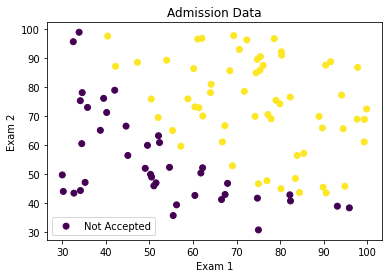

In [5]:
fig, axes = plt.subplots()

axes.scatter(dataset['exam1'], dataset['exam2'],c=dataset['acceptance'],label='Not Accepted')
axes.set_xlabel('Exam 1')
axes.set_ylabel('Exam 2')
axes.set_title('Admission Data')
axes.legend()




b) Implement the sigmoid function, the cost function and gradient descent for logistic
regression


In [6]:
## I probably did more work than needed below, but I provided at the very least your requirements. 

In [7]:
# this is a matrix I will use to test my algorithms below
matrix = np.array([[1, 5, 6]])

# Get the dimensions of the matrix
rows, columns = matrix.shape

# Print the dimensions
print("Rows:", rows)
print("Columns:", columns)


Rows: 1
Columns: 3


In [8]:
matrix[0]

array([1, 5, 6])

In [9]:
full_matrix = dataset[['exam1','exam2']].values

In [10]:
ones_column = np.ones((full_matrix.shape[0], 1))
full_matrix = np.hstack((ones_column, full_matrix))

In [11]:
outcomes = dataset['acceptance'].values

In [12]:
import math

In [13]:
# This sigmoid is used for training:
def sigmoidFct(x,theta):
    
    z = np.dot(x.ravel(), theta.ravel())
    return 1 / (1 + np.exp(-z))

In [14]:
# This sigmoid is used for actual predictions:

def sigmoidFctForPredictions(x,theta):
    z = np.dot(x.ravel(), theta.ravel())
    result = 1 / (1 + np.exp(-z))
    if (result > 0.5):
        return 1
    else: 
        return 0

In [15]:
def lossFunction(x, y, theta):
    eps = 1e-10  # small value added to avoid math domain errors
    y_pred = sigmoidFct(x, theta)
    loss = -y*math.log(y_pred + eps) - (1-y)*math.log(1-y_pred + eps)
    return loss

In [16]:
full_matrix[0]

array([ 1.        , 34.62365962, 78.02469282])

In [17]:
def costFunction(matrix,outcomes,theta):
    total_cost = 0
    for i in range(0, matrix.shape[0]):
        total_cost += lossFunction(matrix[i],outcomes[i],theta)
    
    return total_cost/ matrix.shape[0]

In [18]:
def gradientDescent(matrix,outcomes,theta,alpha):
    num_params = theta.shape[1]
    theta_updates = np.zeros((1, num_params))
    for i in range(num_params):
        if i==0:
            theta_updates[0,i] = partialDerivativeWithB(matrix,outcomes,theta)
        else:
            theta_updates[0,i] = partialDerivativeWithW(matrix,outcomes,theta,theta[0,i])
    # the update happens here
    theta = theta - alpha * theta_updates
    return theta

In [19]:
def partialDerivativeWithW(matrix,outcomes,theta,theta_j):
    m = matrix.shape[0]
    summation = 0
    for i in range(0, m):
        summation += (sigmoidFct(matrix[i],theta) - outcomes[i])*theta_j
    return (1/m)*summation

In [20]:
def partialDerivativeWithB(matrix,outcomes,theta):
    m = matrix.shape[0]
    summation = 0
    for i in range(0, m):
        summation += (sigmoidFct(matrix[i],theta) - outcomes[i])
    return (1/m)*summation

In [21]:
def plottingFunction(weights,dataset):
    # Calculate the intercept and gradient of the decision boundary.
    b = -weights[0][0]/weights[0][2]
    m = -weights[0][1]/weights[0][2]
    x = np.linspace(0, 100, 100)
    y = m*x + b
    # designing the figure
    fig, axes = plt.subplots()
    axes.scatter(dataset['exam1'], dataset['exam2'],c=dataset['acceptance'],label='Not Accepted')
    axes.set_xlabel('Exam 1')
    axes.set_ylabel('Exam 2')
    axes.set_title('Admission Data')
    plt.plot(x, y)
    axes.legend()

In [22]:
## Below I will train the model with my own code for logistic regression. Then, I will train it using optimize.fmin

In [23]:
weights = np.array([[0.00000001, 100, 50]])

In [24]:
# The function below represents before I train my model

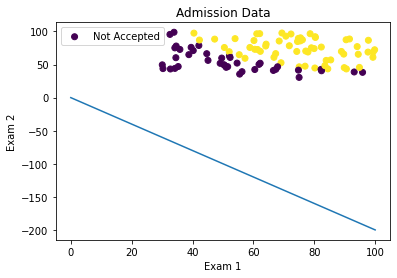

In [25]:
plottingFunction(weights,dataset)

In [26]:
## Trying to find optimal theta values:
## convergence criteria: 10,000 iterations
# Initial guess:
weights = np.array([[0.00000001, 100, 50]])
for i in range(0,10000):
    weights = gradientDescent(full_matrix,outcomes,weights,0.1)


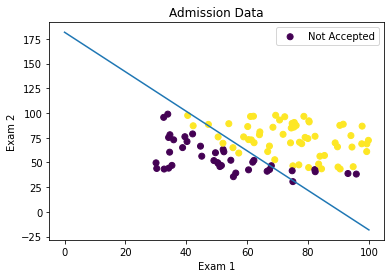

In [27]:
# After training:
plottingFunction(weights,dataset)

In [28]:
# your code here

c) Use the scipy.optimize function ”fmin” to learn the parameter θ


In [29]:
# I need to change the order of the loss function and cost function inputs for the scipy.optimize.fmin function
def lossFunctionFmin(theta, input_matrix, outcomes):
    return lossFunction(input_matrix,outcomes,theta)

def costFunctionFmin(theta, input_matrix, outcomes):
    return costFunction(input_matrix,outcomes,theta)

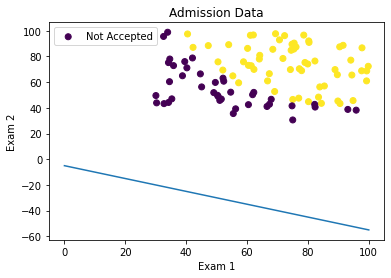

In [30]:
theta_init = np.array([[1, 0.1, 0.2]])
# before training:
plottingFunction(theta_init,dataset)

In [31]:
# use fmin to minimize the cost function
theta_init = optimize.fmin(costFunctionFmin, x0=theta_init, args=(full_matrix, outcomes))
theta_init = [theta_init] # Just doing this to keep the list in the same dimesions as before the function call
print("Optimal parameters:", theta_init)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 128
         Function evaluations: 234
Optimal parameters: [array([-25.1613221 ,   0.20623171,   0.20147137])]


d) Plot the decision boundary obtained with the data

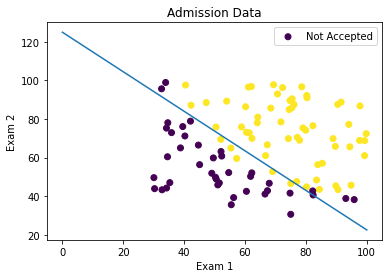

In [32]:
# After training:
plottingFunction(theta_init,dataset)

# Part 2 - Decision Trees

In this exercise, you will build and train decision tree models to predict whether a student gets admitted into a university, using the applicant’s score (pass/fail) on five exams.  

### Data Preprocessing

a) Given the file ”admission_data2.csv”<br>

*   import the data file<br>
*   Start by encoding the categorical features in the dataset




In [33]:
dataset_for_tree = pd.read_csv('admission_data2.csv',names=['exam1','exam2','exam3','exam4','exam5','acceptance'],index_col=False)

In [34]:
dataset_for_tree

,exam1,exam2,exam3,exam4,exam5,acceptance
0,Fail,Pass,Pass,Fail,Fail,0
1,Fail,Fail,Pass,Fail,Fail,0
2,Fail,Pass,Fail,Pass,Fail,0
3,Pass,Pass,Fail,Pass,Pass,1
4,Pass,Pass,Pass,Pass,Pass,1
...,...,...,...,...,...,...
95,Pass,Fail,Pass,Pass,Fail,1
96,Fail,Pass,Pass,Pass,Pass,1
97,Pass,Pass,Pass,Pass,Pass,1
98,Pass,Pass,Pass,Pass,Pass,1


b) Build 5 different possible decision trees of height 2 and report the performance of each decision tree model 
    <br> <b>using the accuracy metric </b>

In [35]:
# leave nodes will have prediction in the attribute of exam number
class Node:
    def __init__(self, left, right, exam):
        self.left = left
        self.right = right
        self.exam_number = exam

In [36]:
# The whole tree will have a height of 2. I just set this variable = 1, because it is easier within my code
height = 1

In [37]:
class Tree:

    def recursiveNodeCreator(self,stop,level,value):
        value = None
        if (stop==level):
            return Node(None,None,None)
        else: 
            return Node(self.recursiveNodeCreator(stop,level+1,value),self.recursiveNodeCreator(stop,level+1,value),None)
    
    def __init__(self,depth,value):
        self.root = Node(self.recursiveNodeCreator(depth,1,value),self.recursiveNodeCreator(depth,1,value),None)
        self.depth = depth
    

In [38]:
# creating a list with the exam numbers
dataset_for_tree.columns

columns_required =dataset_for_tree.columns[0:5]

columns_required 

Index(['exam1', 'exam2', 'exam3', 'exam4', 'exam5'], dtype='object')

In [39]:
import random 

In [40]:
# adds one more parameter to the list
def recursiveTreeValueAdd(dataset_columns,level,Node):
    recursiveTreeValueAddAssist(dataset_columns,level,Node,0)

In [41]:
# a recursive score that sets the exam representation of a given node. It also sets the prediction at the leave nodes using
# a random choice 
def recursiveTreeValueAddAssist(dataset_columns,level,Node,exams_passed):
    stop = height
    if ((Node!=None) and (level<stop)):
        Node.exam_number = dataset_columns[level]
        if (Node.left != None):
            recursiveTreeValueAddAssist(dataset_columns,level+1,Node.left,exams_passed)
        if (Node.right != None):
            recursiveTreeValueAddAssist(dataset_columns,level+1,Node.right,exams_passed+1)
    if ((stop==level)):
        Node.exam_number = dataset_columns[level]
        # Here I set the decision tree as marking the student as accepted if he/she has passed at least 1 exam within the 
        # exams that were considered in the tree
        Node.left.exam_number = (exams_passed>0)
        Node.right.exam_number = True

In [42]:
MyTree = Tree(height+1,0)

In [43]:
recursiveTreeValueAdd(columns_required,0,MyTree.root)

In [44]:
def printLevelOrder(root):
    if not root:
        return

    queue = []
    queue.append(root)

    while queue:
        level_size = len(queue)

        for i in range(level_size):
            node = queue.pop(0)
            print(node.exam_number, end=' ')

            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)

        print()

In [45]:
# Testing
printLevelOrder(MyTree.root)

exam1 
exam2 exam2 
False True True True 


In [46]:
# This list will be where the code that builds the trees will get its values
# It basically changes the order of the columns to then create different trees
columns_final = []
for i in range(0,5):
    columns_final.append([])
    for j in range(0,height+1):
        columns_final[i].append(columns_required[(j+i)%5])

In [47]:
columns_final

[['exam1', 'exam2'],
 ['exam2', 'exam3'],
 ['exam3', 'exam4'],
 ['exam4', 'exam5'],
 ['exam5', 'exam1']]

In [48]:
# creation of the trees
list_of_trees = []
for i in range(0,5):
    print('New Tree')
    list_of_trees.append(Tree(height+1,0))
    recursiveTreeValueAdd(columns_final[i], 0, list_of_trees[i].root)
    printLevelOrder(list_of_trees[i].root)
    print('')

New Tree
exam1 
exam2 exam2 
False True True True 

New Tree
exam2 
exam3 exam3 
False True True True 

New Tree
exam3 
exam4 exam4 
False True True True 

New Tree
exam4 
exam5 exam5 
False True True True 

New Tree
exam5 
exam1 exam1 
False True True True 



In [49]:
# IMPORTANT NOTE:
# I set a simple criteria in my decision tree: If any of the exams were passed, it is predicted as an acceptance.

In [50]:
(dataset_for_tree[MyTree.root.exam_number][0])=='Fail'

True

In [51]:
# prediction
def resultOfCandidate(dataset, candidate_number, node):
    if (node.exam_number == False):
        return False
    elif (node.exam_number == True):
        return True
    elif (dataset_for_tree[node.exam_number][candidate_number]=='Fail'):
        return resultOfCandidate(dataset, candidate_number, node.left)
    else: 
        return resultOfCandidate(dataset, candidate_number, node.right)
        

In [52]:
# Calculating the number of correct predictions using my tree
accuracy_of_trees = []
for i in range(5):
    count = 0
    for j in range(100):
        answer = 0
        # converting the Boolean output to 0 or 1, representing true or false
        if (resultOfCandidate(dataset_for_tree,j,list_of_trees[i].root)):
            answer = 1
        else: 
            answer = 0
        if (answer == dataset_for_tree['acceptance'][j]):
            count += 1
    accuracy_of_trees.append(count)

In [53]:
# These are the accuracy of the 5 different trees
accuracy_of_trees

[65, 64, 51, 54, 66]

In [54]:
# Thus, the accuracy_of_trees list above represents the accuracy of each decision tree. The lowest accuracy achieved is 54 and 
# the highest achieved is 66. 
# I did not use the 5-fold validation metric here since it does not make sense. The algorithm does not train on the data and
# thus we can test it on the whole data. 5-fold validation is made for algorithms that train on data, in order to reduce the 
# likelihood that the results shown are outliers.

c) Is accuracy a good metric for the provided dataset? Explain. 

#### your answer here:

The accuracy metric is not good because it is too general. It obscures whether the correct predictions were true positives 
or true negatives. It also obscures the false positives or false negatives. A better metric would be both precision and recall.
These metrics allow us to properly understand what was properly classified and what was not. From there, we can fine-tune our
model based on what metric (precision or recall) we want to improve.
Finally, it would be good to use the F1 score to measure the models performace. It would provide a balanced accuracy metric
using both precision and recall in its calculation

d) Implement the Entropy and Information Gain functions. 

In [56]:
import math

In [57]:
def entropyFunction(p1):
    eps = 1e-10  # small value added to avoid math domain errors
    p0 = 1-p1
    return -1*(p1*math.log(p1+eps,2)+p0*math.log(p0+eps,2))

In [58]:
def informationGain(hRoot,hLeft,hRight,wLeft,wRight):
    return hRoot - (wLeft*hLeft + wRight*hRight)

In [59]:
def calculationOfGain(column,dataset):
    results_information_gain = []
    count = dataset['acceptance'].value_counts()[1]/len(dataset)
    hRoot = entropyFunction(count)
    
    # information needed to calculate entropy and information gain
    # for the left
    if ((False not in dataset[column]) | True not in dataset[column]):
        return 1
    sample_size_left = dataset[column].value_counts()[False] 
    dataset_left = dataset[(dataset[column] != True)]
    acceptance_counts = dataset_left['acceptance'].value_counts()
    correct_cases_left = acceptance_counts[1] if 1 in acceptance_counts else 0

    hLeft = entropyFunction(correct_cases_left/sample_size_left)
    wLeft = sample_size_left/len(dataset)
    # for the right
    sample_size_right = dataset[column].value_counts()[True] 
    dataset_right = dataset[(dataset[column] != False)] 
    acceptance_counts = dataset_right['acceptance'].value_counts()
    correct_cases_right = acceptance_counts[1] if 1 in acceptance_counts else 0
    hRight = entropyFunction(correct_cases_right/sample_size_right)
    wRight = sample_size_right/len(dataset)
                            
    # We now have all information needed to call the information gain
    return informationGain(hRoot,hLeft,hRight,wLeft,wRight)


In [60]:
# your code here

-	Build a decision tree model that maximizes the information gain at every split, and experiment with different stopping criteria: <br>
    * Experiment with 3 different maximum tree heights <br>
    * Experiment with 3 different minimum thresholds for information gain <br>
    * Experiment with 3 different thresholds for the minimum number of examples to split on <br>
    * Report the results of all your experiments in a table and highlight the parameters and stopping condition for your best performing model. 


In [61]:
# finds the best potential feature at any given level
def bestFeatureAtLevel(dataset,columns_required):
    max_value = [-1,'placeholder']
    for i in (columns_required):
        if i != False:
            result = calculationOfGain(i,dataset)
            if (result > max_value[0]):
                max_value[0] = result
                max_value[1] = i
    return max_value[1]

In [62]:
# This function basically calls a function that finds the most important feature, then provides the current node with that value,
#, creates two subbranches and creates the relevant information it needs to perform its functionalities, by calling itself
# recursively

def subTreeCreator(dataset,inner_columns,node,level,stopping_criteria,stopping_criteria_input):
    # base cases
    unique_values = dataset['acceptance'].unique()
    if len(unique_values) == 1:
        node.exam_number = unique_values[0]
        return node
    if (stopping_criteria =='stoppingCriteriaHeight'):
        if (stoppingCriteriaHeight(level,stopping_criteria_input)):
            return exitingTreeCreator(dataset,node)
    
    if (len(inner_columns)==0):
        return exitingTreeCreator(dataset,node)
    
    feature_split = bestFeatureAtLevel(dataset,inner_columns)

    if (stopping_criteria=='stoppingCriteriaInfoGain'):
        if(stoppingCriteriaInfoGain(feature_split,dataset,stopping_criteria_input)):
            return exitingTreeCreator(dataset,node)
    
    # creating subsets based on feature:
    dataset_left_branch = dataset[(dataset[feature_split] != True)]
    dataset_right_branch = dataset[(dataset[feature_split] != False)]
    
    # another potential stopping condition:
    if (stopping_criteria == 'stoppingCriteriaMinSample'):
        if (stoppingCriteriaMinSample(len(dataset_left_branch),len(dataset_right_branch),stopping_criteria_input)):
            return exitingTreeCreator(dataset,node)
    
    if (level==6):
            return exitingTreeCreator(dataset,node)
    
    sub_features = create_new_list(inner_columns,feature_split)
    # providing value to node
    node.exam_number = feature_split
    # recursive calls
    if (dataset_left_branch.empty | dataset_right_branch.empty):
        return exitingTreeCreator(dataset,node)
    else:
        node.left = subTreeCreator(dataset_left_branch,sub_features,Node(None,None,None),level+1,stopping_criteria,stopping_criteria_input)
        node.right = subTreeCreator(dataset_right_branch,sub_features,Node(None,None,None),level+1,stopping_criteria,stopping_criteria_input)
    
    return node


In [63]:
len(dataset_for_tree)

100

In [64]:
# a function used in the subTreeCreater above. It helps exit the recursive calls
def exitingTreeCreator(dataset,node):
    #print(dataset['acceptance'])
    unique_values = dataset['acceptance'].unique()
    if len(unique_values) == 1:
        node.exam_number = unique_values[0]
        return node
    else:
        #print("ELSE STATEMENT")
        #print(dataset['acceptance'])
        node.exam_number = round(dataset['acceptance'].value_counts()[1]/len(dataset),2)
    return node

In [65]:
# one of the stopping criterias
def stoppingCriteriaHeight(level,desired):
    if(level==desired):
        return True

In [66]:
# one of the stopping criterias
def stoppingCriteriaInfoGain(feature,dataset,minimum_threshold):
    highest_gain = calculationOfGain(feature,dataset)
    return (highest_gain<minimum_threshold)

In [67]:
# one of the stopping criterias
def stoppingCriteriaMinSample(left_split,right_split,split_criteria):
    if ((left_split<split_criteria) | (right_split<split_criteria)):
        return True
    else:
        return False

In [68]:
def create_new_list(old,feature):
    new_list = []
    for i in (old):
        if (i!=feature):
            new_list.append(i)
    return new_list

In [69]:
# creating a new dataset with Binary values instead of pass/fail. The next couple of cells will be dedicated to this process
binary_dataset = dataset_for_tree.copy(deep=True)
binary_dataset.replace({'Fail': False, 'Pass': True}, inplace=True)


In [70]:
# checking for values which were not changed
binary_dataset.loc[:, ~binary_dataset.isin([True, False]).all()]

,exam3,exam5
0,True,False
1,True,False
2,False,False
3,Fail,True
4,True,True
...,...,...
95,True,False
96,True,True
97,True,True
98,True,True


In [71]:
binary_dataset[3:4]

,exam1,exam2,exam3,exam4,exam5,acceptance
3,True,True,Fail,True,True,1


In [72]:
binary_dataset.at[3, 'exam3'] = False


In [73]:
binary_dataset[3:4]

,exam1,exam2,exam3,exam4,exam5,acceptance
3,True,True,False,True,True,1


In [74]:
temporary = binary_dataset.loc[:, ~binary_dataset.isin([True, False]).all()]

In [75]:
for i in range(100):
    if (temporary['exam5'][i] != True and temporary['exam5'][i]!=False):
        print([i])

[10]


In [76]:
binary_dataset[10:11]

,exam1,exam2,exam3,exam4,exam5,acceptance
10,True,False,True,True,Fail,0


In [77]:
binary_dataset.at[10, 'exam5'] = False


In [78]:
binary_dataset.loc[:, ~binary_dataset.isin([True, False]).all()]

""
0
1
2
3
4
...
95
96
97
98


In [79]:
## The above process of converting the dataset into binary is complete

In [80]:
# class that will predict whether an instance was well classified
def prediction(node,x,y):
    threshold = 0.5
    value = node.exam_number
    if (isinstance(value, np.integer) | isinstance(value, np.float64)):
        if (value>=0.5):
            return 1
        else: 
            return 0
    else:
        extracted_digit = node.exam_number[4]
        # convert a character to an integer
        extracted_digit = ord(extracted_digit) - ord('0')
        result_of_exam = x[extracted_digit-1]

        if (result_of_exam==False):
            return prediction(node.left,x,y)
        if (result_of_exam==True):
            return prediction(node.right,x,y)

In [81]:
# prediction for the whole X_test
def predictingFullTrain(root,X_test, y_test):
    # re-indexing to avoid index out of bound errors
    y_test = y_test.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    result_list = [0,0,0,0]
    # looping over entire testing set and calculating predictions
    for i in range(len(X_test)):
        true_outcome = y_test[i]
        x = X_test.iloc[i].values
        result = prediction(root,x,true_outcome) # calculates the prediction for a given person
        performanceMetric(result,true_outcome,result_list) # calculates performance
    result_dict = labelResults(result_list)
    return result_dict # reports performance

In [82]:
# Creating a list with true positive, true, negative, false positive, false negative scores
def performanceMetric(prediction,outcome,result_list):
    if (prediction==0):
        if (prediction==outcome):
            result = 0 ## true negative
        else:
            result = 1  ## false negative
    if (prediction==1):
        if (prediction==outcome):
            result = 2 ## true positive
        else:
            result = 3  ## false positive
    result_list[result] += 1

In [83]:
# adding precision + recall+ F1 + converting to dictionary
def labelResults(result_list):
    precision = result_list[2] / (result_list[2]+result_list[3])
    recall = result_list[2] / (result_list[2]+result_list[1])
    F1_score = 2 * (precision * recall) / (precision + recall)
    result_list_new = [['True Negatives:', result_list[0]], ['False Negatives:', result_list[1]], ['True Positives', result_list[2]], ['False Positives', result_list[3]]]
    result_dict = {item[0]: item[1] for item in result_list_new}
    result_dict['Precision'] = round(precision,2)
    result_dict['recall'] = round(recall,2)
    result_dict['F1_score'] = round(F1_score,2)
    return result_dict


In [84]:
# Calculates the result of multiples tress calling the functions above
def calculateBundleOfTrees(root_list, X_test,y_test):
    output_dict = dict()
    for i in range(len(root_list)):
        output_dict[f'Tree{i}'] = predictingFullTrain(root_list[i],X_test,y_test)
    return output_dict

In [85]:
# I need to use this library to manage to do a 5-fold cross validation. I am just using the library to create the datasets, 
# and nothing else. I will be used in the functino five_fold_cross_val below:
from sklearn.model_selection import KFold

### Still need to add the parameters that changes the base case of the creator

In [86]:
# This creates the separate datasets, calls on the other functions to create the decision trees, tests the decision trees and 
# returns all of the outcomes in the form of a dictionary

def fiveFoldCrossVal(dataset,stopping_criteria,stopping_criteria_input):
    all_models = dict()
    # Initializing the 5-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    index = 0
    for train_index, test_index in kf.split(dataset):
        different_parameter_tree = []
        # Split the data into training and testing sets for this fold
        X_train, X_test = dataset.iloc[train_index], dataset.iloc[test_index]
        y_train, y_test = X_train['acceptance'], X_test['acceptance']
        X_train.drop('acceptance', axis=1, inplace=True)
        X_test.drop('acceptance', axis=1, inplace=True)
    
        train_data = pd.concat([X_train, y_train], axis=1)

        # changing the type of the list
        features_list = []
        for i in range(5):
            features_list.append(columns_required[i])
        # creating the decision tree
        for j in range(0,3):
            root = subTreeCreator(train_data,features_list,Node(None,None,None),0,stopping_criteria,stopping_criteria_input[j])
            different_parameter_tree.append(root)
        # testing the decision tree
        result_dict = calculateBundleOfTrees(different_parameter_tree,X_test,y_test)
        # retrives the highest F1 score of the ith level of cross validation
        all_models[f'iteration{index}'] = result_dict
        index +=1
    return all_models

stopping_criteria_input[j]

In [87]:
# this will calculate the average of all cross validations 
def averagesCrossVal(all_models,number_of_trees):
    all_averages = dict()
    for i in range(number_of_trees):
        total = 0
        for j in range(5):
            total += all_models[f'iteration{j}'][f'Tree{i}']['F1_score']
            
        average = total/5
        all_averages[f'Tree{i}'] = average
    return all_averages

    

In [88]:
# returns max element in dictionary
def bestPerforming(dictionary):
    return max(dictionary, key=lambda k: dictionary[k])

In [89]:
# can perform the whole process of creating the trees and testing them
def fullProcess(dataset,stopping_criteria,stopping_criteria_input):
    all_models = fiveFoldCrossVal(dataset,stopping_criteria,stopping_criteria_input)
    averages = averagesCrossVal(all_models,3) # I might need to change this 3 later
    return bestPerforming(averages)

In [90]:
# removes keys that are not needed to create the table
def remove_keys(dictionary,new_names):
    for i in dictionary:
        for j in dictionary[i]:
            dictionary[i][j] = {k: v for k, v in dictionary[i][j].items() if k in 'F1_score'}
        
        dictionary[i] = {new_names[z]: v for z, (k, v) in enumerate(dictionary[i].items())}

    return dictionary

In [91]:
# to add title to table
from IPython.display import Markdown

In [92]:
# code to create the table:
def tableCreator(data,title,new_names):
    data = remove_keys(data,new_names)
    data_list = [(iteration, tree, score['F1_score']) for iteration in data for tree, score in data[iteration].items()]
    df = pd.DataFrame(data_list, columns=['Iteration', 'Criteria', 'F1_score'])
    table = pd.pivot_table(df, values='F1_score', index='Iteration', columns='Criteria',
                          margins=True, margins_name='Average', aggfunc='mean',
                           fill_value='-')
    display(Markdown(f"F1 scores; 5-fold Cross Validation. Stopping Criteria:{title}"))
    display(table)
    return table

In [93]:
# these are all the possible stopping criteria that will be used
stop_criteria_list = ['stoppingCriteriaHeight','stoppingCriteriaInfoGain','stoppingCriteriaMinSample']

In [94]:
stop_criteria_dict = dict()
stop_criteria_dict[stop_criteria_list[0]] = [2,3,4]  # different levels of stop criteria: height
stop_criteria_dict[stop_criteria_list[1]] = [0.02,0.15,0.23]  # different info gain 
stop_criteria_dict[stop_criteria_list[2]] = [1,15,40]  # different min sample options

In [95]:
stop_criteria_list[0]

'stoppingCriteriaHeight'

In [96]:
stop_criteria_dict[stop_criteria_list[0]]

[2, 3, 4]

In [97]:
result_max_height = fiveFoldCrossVal(binary_dataset,stop_criteria_list[0],stop_criteria_dict[stop_criteria_list[0]])

C:\Users\olive\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\olive\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\olive\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\olive\anaconda3\lib

##### I will now create 3 trees of different heights


In [98]:
        features_list = []
        for i in range(5):
            features_list.append(columns_required[i])

In [99]:
table_max_height = tableCreator(result_max_height, "Max Height",stop_criteria_dict[stop_criteria_list[0]])

F1 scores; 5-fold Cross Validation. Stopping Criteria:Max Height

Criteria,2,3,4,Average
Iteration,,,,
iteration0,0.92,0.92,0.92,0.92
iteration1,0.77,0.77,0.81,0.783333
iteration2,0.74,0.74,0.7,0.726667
iteration3,0.92,0.92,0.92,0.92
iteration4,0.95,0.95,1.0,0.966667
Average,0.86,0.86,0.87,0.863333


#### 3 different minimum thresholds for information gain 

In [100]:
result_info_gain = fiveFoldCrossVal(binary_dataset,stop_criteria_list[1],stop_criteria_dict[stop_criteria_list[1]])

C:\Users\olive\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\olive\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\olive\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\olive\anaconda3\lib

In [101]:
table_info_gain = tableCreator(result_info_gain, "Info Gain",stop_criteria_dict[stop_criteria_list[1]])

F1 scores; 5-fold Cross Validation. Stopping Criteria:Info Gain

Criteria,0.02,0.15,0.23,Average
Iteration,,,,
iteration0,0.92,0.92,0.75,0.863333
iteration1,0.81,0.81,0.81,0.81
iteration2,0.7,0.7,0.71,0.703333
iteration3,0.81,0.85,0.75,0.803333
iteration4,1.0,1.0,1.0,1.0
Average,0.848,0.856,0.804,0.836


#### 3 different minimum threshold for sample size 

In [102]:
result_info_MinSample = fiveFoldCrossVal(binary_dataset,stop_criteria_list[2],stop_criteria_dict[stop_criteria_list[2]])

C:\Users\olive\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\olive\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\olive\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\olive\anaconda3\lib

In [103]:
table_info_MinSample = tableCreator(result_info_MinSample, "Min Sample",stop_criteria_dict[stop_criteria_list[2]])

F1 scores; 5-fold Cross Validation. Stopping Criteria:Min Sample

Criteria,1,15,40,Average
Iteration,,,,
iteration0,0.92,0.92,0.75,0.863333
iteration1,0.81,0.77,0.82,0.8
iteration2,0.7,0.74,0.71,0.716667
iteration3,0.81,0.92,0.75,0.826667
iteration4,1.0,0.95,0.71,0.886667
Average,0.848,0.86,0.748,0.818667


In [104]:
# a tree to be used lated
root = subTreeCreator(binary_dataset,features_list,Node(None,None,None),0,stop_criteria_list[0],stop_criteria_dict[stop_criteria_list[0]][2])

In [105]:
# merging the models together
merged_df = pd.merge(table_info_gain, table_info_MinSample, left_index=True, right_index=True)


merged_df = merged_df.drop(columns=['Average_x', 'Average_y'], axis=1)


merged_df = pd.merge(merged_df, table_max_height, left_index=True, right_index=True)

merged_df.columns = merged_df.columns.astype(str)

In [106]:
# Renaming columns in dataframe
common_titles = ['Info Gain', 'Min Sample', 'Max Height']
new_column_names = []
for i in range(0,3):
    for j in range(0+i*3,i*3+3):
        new_column_names.append(common_titles[i]+": "+str(merged_df.columns[j]))
new_column_names.append(merged_df.columns[9])
merged_df.columns = new_column_names

In [107]:
# Highlighting the best performing model

# These are F1 Scores of each model

highlight_style = [{'selector': 'th:nth-child(10),td:nth-child(10)', 'props': [('background-color', 'yellow')]}]

styled_df = merged_df.style.set_table_styles(highlight_style)

display(styled_df)

,Info Gain: 0.02,Info Gain: 0.15,Info Gain: 0.23,Min Sample: 1,Min Sample: 15,Min Sample: 40,Max Height: 2,Max Height: 3,Max Height: 4,Average
Iteration,,,,,,,,,,
iteration0,0.920000,0.920000,0.750000,0.920000,0.920000,0.750000,0.920000,0.920000,0.920000,0.920000
iteration1,0.810000,0.810000,0.810000,0.810000,0.770000,0.820000,0.770000,0.770000,0.810000,0.783333
iteration2,0.700000,0.700000,0.710000,0.700000,0.740000,0.710000,0.740000,0.740000,0.700000,0.726667
iteration3,0.810000,0.850000,0.750000,0.810000,0.920000,0.750000,0.920000,0.920000,0.920000,0.920000
iteration4,1.000000,1.000000,1.000000,1.000000,0.950000,0.710000,0.950000,0.950000,1.000000,0.966667
Average,0.848000,0.856000,0.804000,0.848000,0.860000,0.748000,0.860000,0.860000,0.870000,0.863333


In [108]:
temp_input = stop_criteria_dict[stop_criteria_list[0]][0]

## In conlcusion, the best performing model has as stopping condition to create a tree of maximum height 4. The structure of the tree is printed below.

In [109]:
printLevelOrder(root)

exam1 
exam4 exam2 
0 exam2 exam3 exam3 
0 exam3 0 exam4 exam4 exam4 
0 0.33 0.67 0.32 1 0.9 0.9 0.87 
